In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric
import joblib

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]


In [2]:
results_path = "/Volumes/noamaz/modularity/retina/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina"
num_layers = '3'
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/retina_multi_archs/{num_layers}_layers/"

In [57]:
reg_res_path = f'{results_path}/dynamic_retina_{num_layers}_layers/teach_archs_regression_results/'
p = [
    'retina_2023-08-16-11-37-43_lr_0.001_bs_512_output_meta_only_small_db.csv',
    'retina_2023-08-16-11-37-43_lr_0.005_bs_512_output_meta_only_small_db.csv',
    'retina_2023-08-15-13-06-30_lr_0.001_bs_512_output_meta_only_normed_big_db.csv',
    'retina_2023-08-15-13-06-30_lr_0.005_bs_512_output_meta_only_normed_big_db.csv',
    'retina_2023-08-15-18-59-19_lr_0.005_bs_512_output_meta_only_normed_big_net_big_db.csv',
    'retina_2023-08-15-22-05-51_lr_0.001_bs_512_output_meta_only_normed_big_net_big_db.csv',
]
results = [
    pd.read_csv(f"{reg_res_path}/{path}")
    for path in p
]

names = [
    '55K db\nlr 0.001',
    '55K db\nlr 0.005',
    '55K db\nlr 0.005\nbig ANN',
    '99K db\nlr 0.001',
    '99K db\nlr 0.005',
    '99K db\nlr 0.001\nbig ANN',
    '99K db\nlr 0.005\nbig ANN',
]


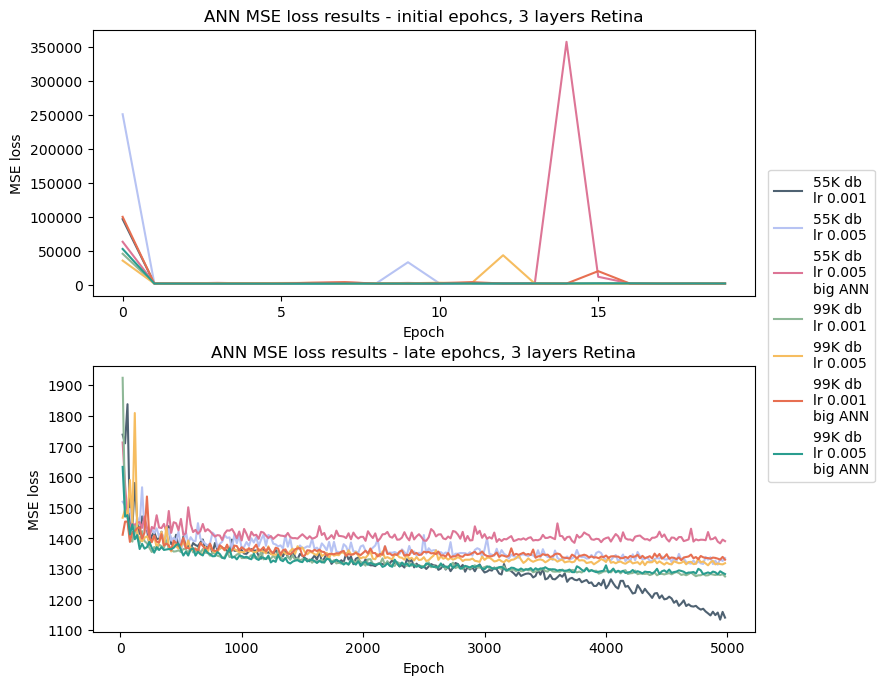

In [102]:
n = 20
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8))
for i, (name, res) in enumerate(zip(names, results)):
    ax1.plot(res['Epoch'][:n], res['losses'][:n], label=f'{name}', c=COLORS[i])
    ax2.plot(res['Epoch'][n::20], res['losses'][n::20], label=f'{name}', c=COLORS[i])
ax1.set_title('ANN MSE loss results - initial epohcs, 3 layers Retina')
ax2.set_title('ANN MSE loss results - late epohcs, 3 layers Retina')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('MSE loss')
ax2.set_ylabel('MSE loss')
ax1.set_xticks(np.arange(n)[::5])
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.95, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.95, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=1, fancybox=True, bbox_to_anchor=(1.1, 0.5))
plt.savefig(
    f"{plot_path}/{time_str}_loss_ANN.png")
plt.show()

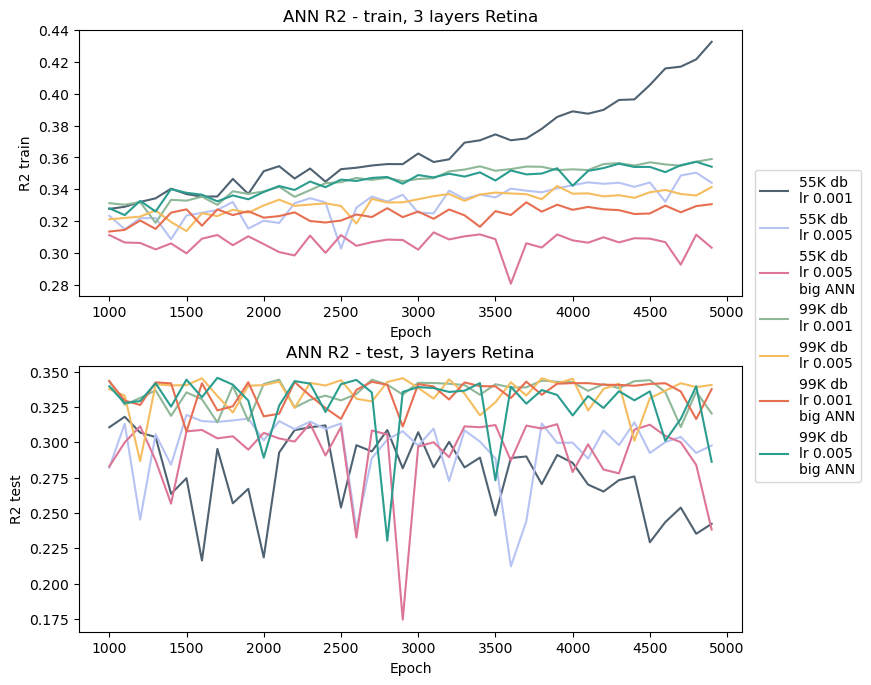

In [104]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8))
for i, (name, res) in enumerate(zip(names, results)):
    ax1.plot(res['Epoch'][1000::100], res['r2s train'][1000::100], label=f'{name}', c=COLORS[i])
    ax2.plot(res['Epoch'][1000::100], res['r2s test'][1000::100], label=f'{name}', c=COLORS[i])
ax1.set_title('ANN R2 - train, 3 layers Retina')
ax2.set_title('ANN R2 - test, 3 layers Retina')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('R2 train')
ax2.set_ylabel('R2 test')
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.95, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.95, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=1, fancybox=True, bbox_to_anchor=(1.1, 0.5))
plt.savefig(
    f"{plot_path}/{time_str}_r2_ANN.png")
plt.show()

In [93]:
lgb_res_path = '/Volumes/noamaz/modularity/retina/dynamic_retina_3_layers//lightgbm_regression_tree/2023-08-15-14-15-34_lightgbm_regression_results.pkl'

with open(lgb_res_path, 'rb') as fp:
    lgb_res = joblib.load(fp)
a=lgb_res.pop('big')

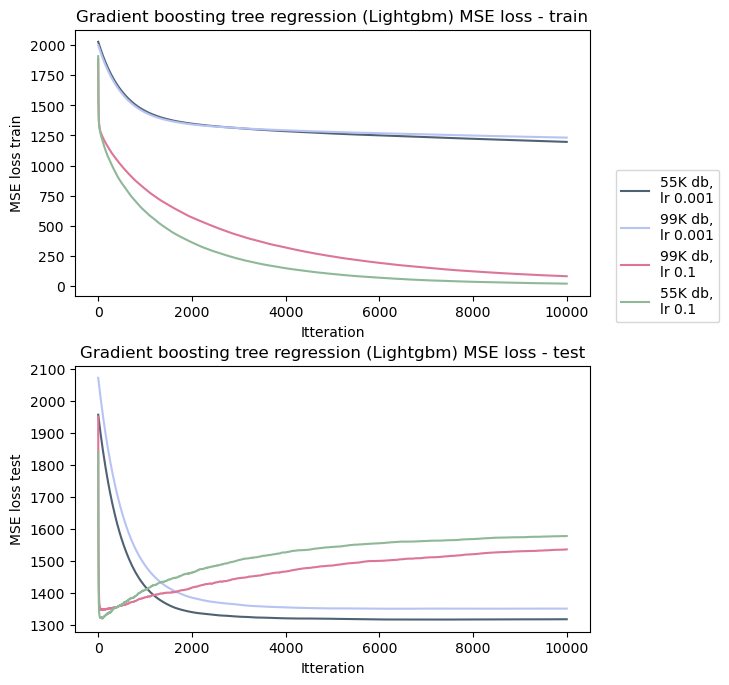

In [90]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8))
lgm_names = ['55K db,\nlr 0.001', '99K db,\nlr 0.001',  '99K db,\nlr 0.1', '55K db,\nlr 0.1',]
for i, (lgm_name, (res_k, res_v)) in enumerate(zip(lgm_names, lgb_res.items())):
    if res_k == 'big':
        continue
    ax1.plot(np.arange(len(res_v['mse_loss_train']['l2'])), res_v['mse_loss_train']['l2'], label=f'{lgm_name}', c=COLORS[i])
    ax2.plot(np.arange(len(res_v['mse_loss_test']['l2'])), res_v['mse_loss_test']['l2'], label=f'{lgm_name}', c=COLORS[i])
ax1.set_title('Gradient boosting tree regression (Lightgbm) MSE loss - train')
ax2.set_title('Gradient boosting tree regression (Lightgbm) MSE loss - test')
ax1.set_xlabel('Itteration')
ax2.set_xlabel('Itteration')
ax1.set_ylabel('MSE loss train')
ax2.set_ylabel('MSE loss test')
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.95, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.95, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=1, fancybox=True, bbox_to_anchor=(1.15, 0.5))

Text(0, 0.5, 'R2 - test')

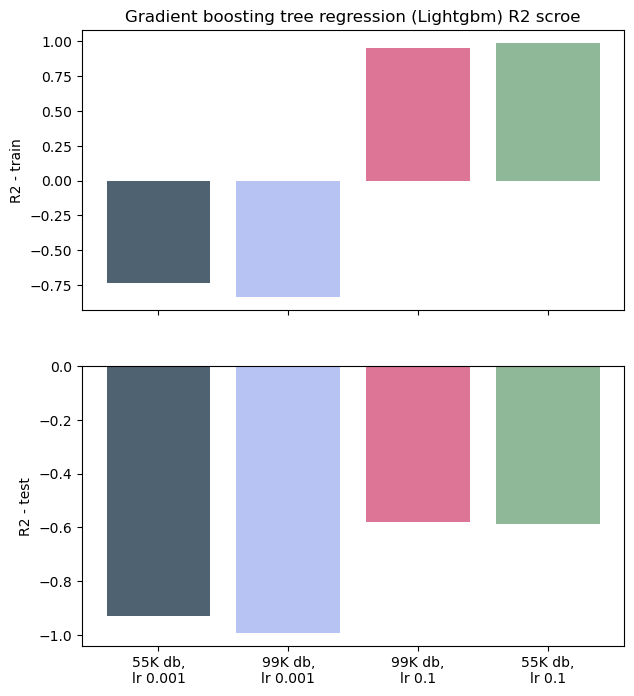

In [91]:
train_r2s = [
    res_v['train_r2']
    for  res_v in lgb_res.values()
]
test_r2s = [
    res_v['test_r2']
    for  res_v in lgb_res.values()
]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), sharex='all')
ax1.bar(lgm_names, train_r2s, color=COLORS)
ax2.bar(lgm_names, test_r2s, color=COLORS)
ax1.set_title('Gradient boosting tree regression (Lightgbm) R2 scroe')
#ax2.set_title('Gradient boosting tree regression (Lightgbm) R2 - test')
ax1.set_ylabel('R2 - train')
ax2.set_ylabel('R2 - test')